## K-Means Clustering (Tugas 5)

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

## Ambil data

In [2]:
%cd /content/drive/MyDrive/datamining/tugas/Iris/

/content/drive/MyDrive/datamining/tugas/Iris


In [20]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
data = df.drop(columns=['Id'])

## Shape data

In [27]:
data.shape

(150, 5)

In [28]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

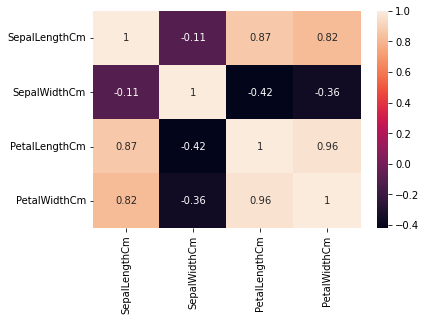

In [30]:
sns.heatmap(data.corr(), annot = True, linecolor='black')

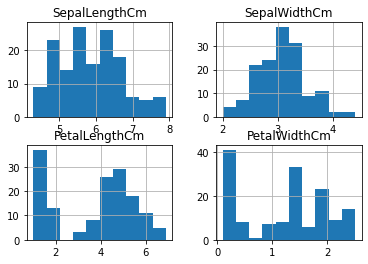

In [31]:
data.hist()
plt.show()

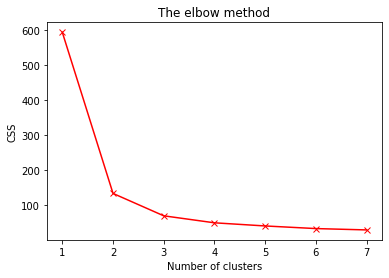

In [32]:
# Settin the data
x=data.iloc[:,0:3].values

css=[]

# Finding inertia on various k values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 8), css, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

## Applying K-Means Classifier

In [33]:
#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

## Visualizing the clusters

In [34]:
kmeans.cluster_centers_

array([[5.84655172, 2.73275862, 4.3637931 ],
       [5.006     , 3.418     , 1.464     ],
       [6.83571429, 3.06428571, 5.6547619 ]])

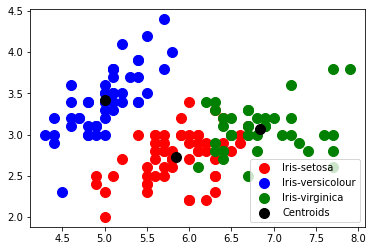

In [35]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()